# **SPOTIFY DATA ANALYSIS**

---


In [7]:
import seaborn as sn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [9]:
data=pd.read_csv('spotify_tracks.csv')
data.head()

,id,name,genre,artists,album,popularity,duration_ms,explicit
0,7kr3xZk4yb3YSZ4VFtg2Qt,Acoustic,acoustic,Billy Raffoul,1975,58,172199,False
1,1kJygfS4eoVziBBI93MSYp,Acoustic,acoustic,Billy Raffoul,A Few More Hours at YYZ,57,172202,False
2,6lynns69p4zTCRxmmiSY1x,Here Comes the Sun - Acoustic,acoustic,"Molly Hocking, Bailey Rushlow",Here Comes the Sun (Acoustic),42,144786,False
3,1RC9slv335IfLce5vt9KTW,Acoustic #3,acoustic,The Goo Goo Dolls,Dizzy up the Girl,46,116573,False
4,5o9L8xBuILoVjLECSBi7Vo,My Love Mine All Mine - Acoustic Instrumental,acoustic,"Guus Dielissen, Casper Esmann",My Love Mine All Mine (Acoustic Instrumental),33,133922,False


In [11]:
#  what are the genres available in dataset

# Get the unique values from the 'genre' column
genres = data['genre'].unique()

# Print the unique genres
print(genres)


['acoustic' 'afrobeat' 'alt-rock' 'alternative' 'ambient' 'anime'
 'black-metal' 'bluegrass' 'blues' 'bossanova' 'brazil' 'breakbeat'
 'british' 'cantopop' 'chicago-house' 'children' 'chill' 'classical'
 'club' 'comedy' 'country' 'dance' 'dancehall' 'death-metal' 'deep-house'
 'detroit-techno' 'disco' 'disney' 'drum-and-bass' 'dub' 'dubstep' 'edm'
 'electro' 'electronic' 'emo' 'folk' 'forro' 'french' 'funk' 'garage'
 'german' 'gospel' 'goth' 'grindcore' 'groove' 'grunge' 'guitar' 'happy'
 'hard-rock' 'hardcore' 'hardstyle' 'heavy-metal' 'hip-hop' 'holidays'
 'honky-tonk' 'house' 'idm' 'indian' 'indie' 'indie-pop' 'industrial'
 'iranian' 'j-dance' 'j-idol' 'j-pop' 'j-rock' 'jazz' 'k-pop' 'kids'
 'latin' 'latino' 'malay' 'mandopop' 'metal' 'metal-misc' 'metalcore'
 'minimal-techno' 'movies' 'mpb' 'new-age' 'new-release' 'opera' 'pagode'
 'party' 'philippines-opm' 'piano' 'pop' 'pop-film' 'post-dubstep'
 'power-pop' 'progressive-house' 'psych-rock' 'punk' 'punk-rock' 'r-n-b'
 'rainy-day' 

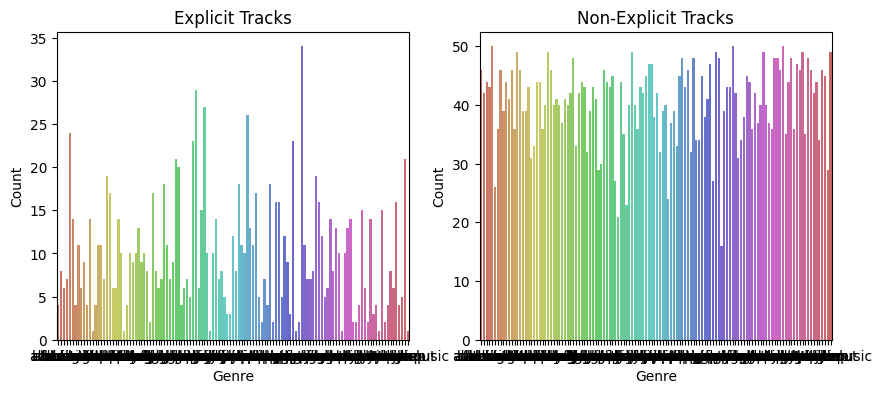

In [23]:
# prompt: positive and negative histogram for explict based on genres

import matplotlib.pyplot as plt
import seaborn as sns

explicit_counts = data.groupby('genre')['explicit'].value_counts()

# Create separate DataFrames for explicit and non-explicit tracks
explicit_df = explicit_counts.loc[:, True].reset_index(name='count')
non_explicit_df = explicit_counts.loc[:, False].reset_index(name='count')

# Create two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

# Plot the histogram for explicit tracks
sns.barplot(x='genre', y='count', data=explicit_df, palette='hls', ax=ax1)
ax1.set_title('Explicit Tracks')
ax1.set_xlabel('Genre')
ax1.set_ylabel('Count')

# Plot the histogram for non-explicit tracks
sns.barplot(x='genre', y='count', data=non_explicit_df, palette='hls', ax=ax2)
ax2.set_title('Non-Explicit Tracks')
ax2.set_xlabel('Genre')
ax2.set_ylabel('Count')

# Show the plot
plt.show()


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6300 entries, 0 to 6299
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           6300 non-null   object
 1   name         6300 non-null   object
 2   genre        6300 non-null   object
 3   artists      6300 non-null   object
 4   album        6300 non-null   object
 5   popularity   6300 non-null   int64 
 6   duration_ms  6300 non-null   int64 
 7   explicit     6300 non-null   bool  
dtypes: bool(1), int64(2), object(5)
memory usage: 350.8+ KB


In [ ]:
data.describe()

,popularity,duration_ms
count,6300.000000,6.300000e+03
mean,30.754762,2.028477e+05
std,19.948991,1.210299e+05
min,0.000000,3.006000e+04
25%,16.000000,1.476870e+05
50%,29.000000,1.916070e+05
75%,45.000000,2.369625e+05
max,90.000000,3.601658e+06


In [ ]:
data.isna().mean() #check for null values

id             0.0
name           0.0
genre          0.0
artists        0.0
album          0.0
popularity     0.0
duration_ms    0.0
explicit       0.0
dtype: float64

Data Explotary

In [ ]:
for i in data.columns:
  print(i)


id
name
genre
artists
album
popularity
duration_ms
explicit


Top 5 most popular artists

In [87]:
top_5_artists=data.groupby('artists')['album'].count().sort_values(ascending=False).head(5)
top_5_artists

artists
Metallica                     22
ONE OK ROCK                   20
Chicago House Selection       18
Death                         17
Progressive House Sessions    16
Name: album, dtype: int64

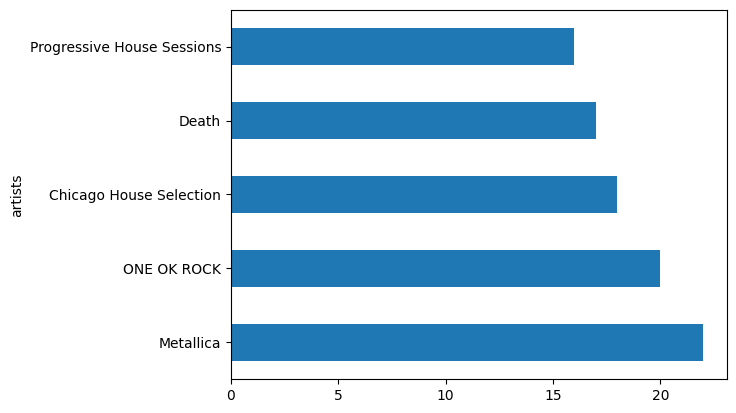

In [90]:
top_5_artists.plot.barh()
plt.show()

Top 5 Tracks Duration

In [94]:
long_duration_tracks=data[['album','duration_ms']].sort_values(by="duration_ms",ascending=False)[:5]
long_duration_tracks

,album,duration_ms
50,Afrobeat 2023 Mixtape,3601658
1690,Peak Focus For Complex Tasks Isochronic Tones ...,3600014
3039,"Fan Sounds: White Noise to Sleep, Rest and Relax",3595000
60,Afrobeats Mix Flight OSO 149,2372414
4898,Reggaeton 2024 Mix,1873718


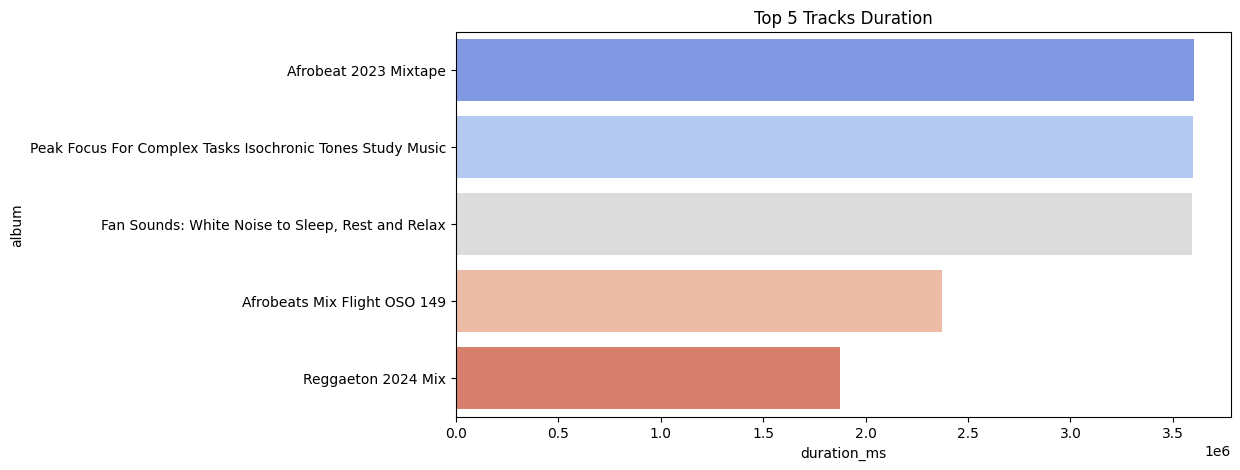

In [101]:
plt.figure(figsize=(10,5))
plt.title("Top 5 Tracks Duration")
sn.barplot(y='album',x='duration_ms', data=long_duration_tracks,palette='coolwarm')
plt.show()

In [ ]:
data=data.drop(columns="id",axis=1)
data

,name,genre,artists,album,popularity,duration_ms,explicit
0,Acoustic,acoustic,Billy Raffoul,1975,58,172199,False
1,Acoustic,acoustic,Billy Raffoul,A Few More Hours at YYZ,57,172202,False
2,Here Comes the Sun - Acoustic,acoustic,"Molly Hocking, Bailey Rushlow",Here Comes the Sun (Acoustic),42,144786,False
3,Acoustic #3,acoustic,The Goo Goo Dolls,Dizzy up the Girl,46,116573,False
4,My Love Mine All Mine - Acoustic Instrumental,acoustic,"Guus Dielissen, Casper Esmann",My Love Mine All Mine (Acoustic Instrumental),33,133922,False
...,...,...,...,...,...,...,...
6295,Voyage to Atlantis,world-music,Future World Music,Reign of Vengeance,25,180001,False
6296,L'Oiseau,world-music,"Putumayo, Marianne Perrudin, Thomas Artaud",Global Relaxation by Putumayo,25,276776,False
6297,The Daintree,world-music,Joseph Tawadros,World Music,12,69533,False
6298,The Sorcerers Symphony,world-music,Future World Music,Behold,26,90001,False


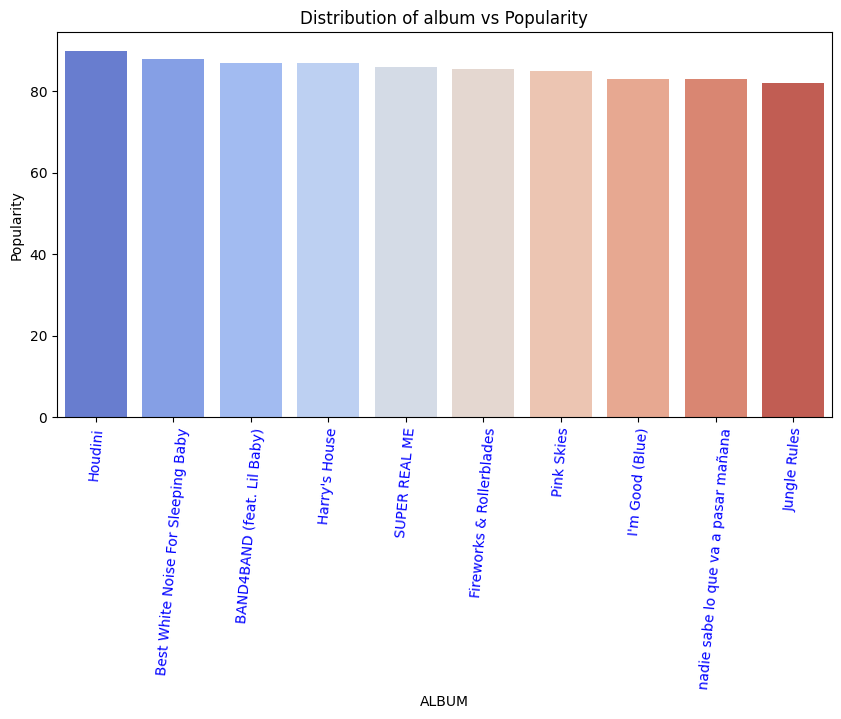

In [ ]:
plt.figure(figsize=(10,5))
plt.title('Distribution of album vs Popularity')
top_10_album=data.groupby('album')['popularity'].mean().sort_values(ascending=False).head(10)
sn.barplot(x=top_10_album.index,y=top_10_album.values,color='r', label='popularity',palette='coolwarm')
plt.xticks(rotation=85, color='b')
plt.xlabel("ALBUM")
plt.ylabel("Popularity")
plt.show()

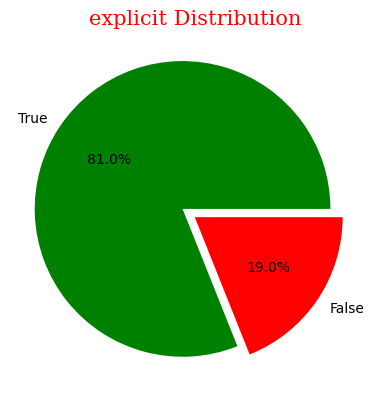

In [ ]:
f={"family":"serif","size":15,"color":"r"}
plt.title("explicit Distribution",fontdict=f)
explicit=data["explicit"].value_counts()
plt.pie(x=explicit,labels=["True","False"],colors=["g","r"],explode=[0.1,0],autopct='%1.1f%%')
plt.show()

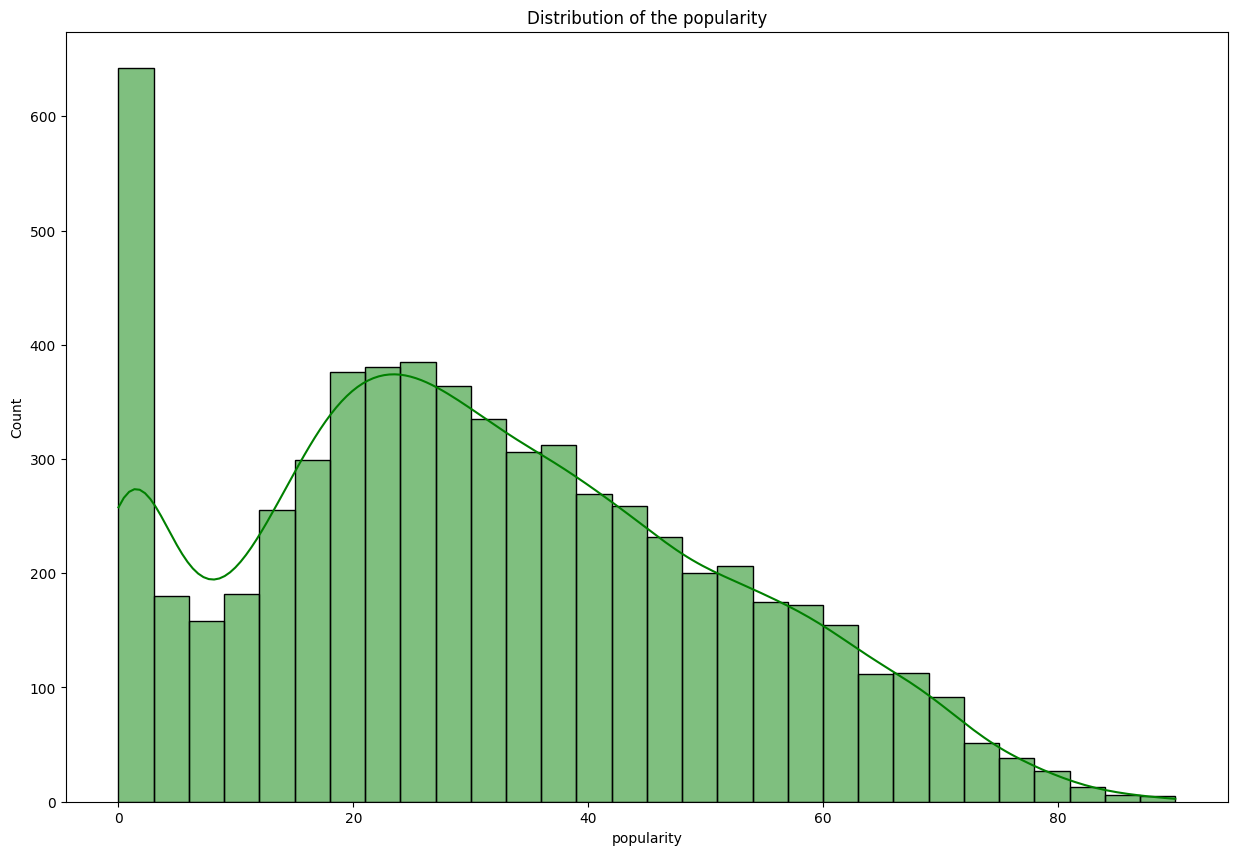

In [20]:
plt.figure(figsize=(15,10))
plt.title("Distribution of the popularity")
plt.xlabel("popularity")
plt.ylabel("Count")
sn.histplot(data["popularity"],color="g",bins=30,kde=True,label="popularity")
plt.show()


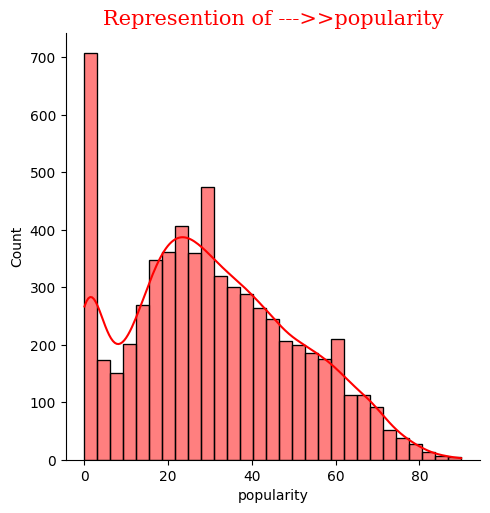

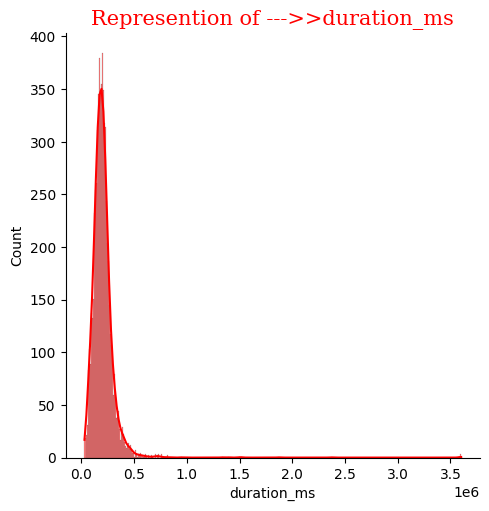

In [ ]:
for col in data.select_dtypes(include="int64").columns:
    sn.displot(data[col],kde=True,color="r",label=col)
    plt.title("Represention of --->>"+col,fontdict=f)

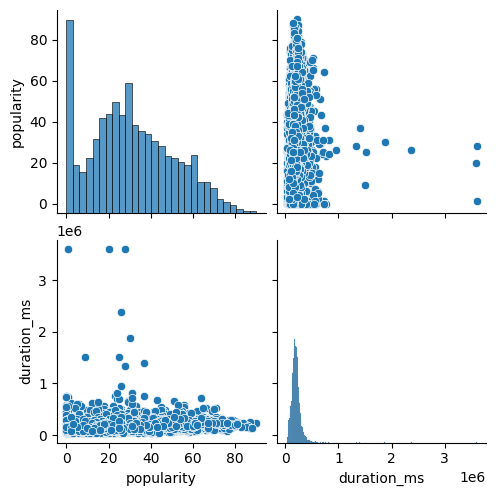

In [ ]:
sn.pairplot(data.select_dtypes(include="int64"))

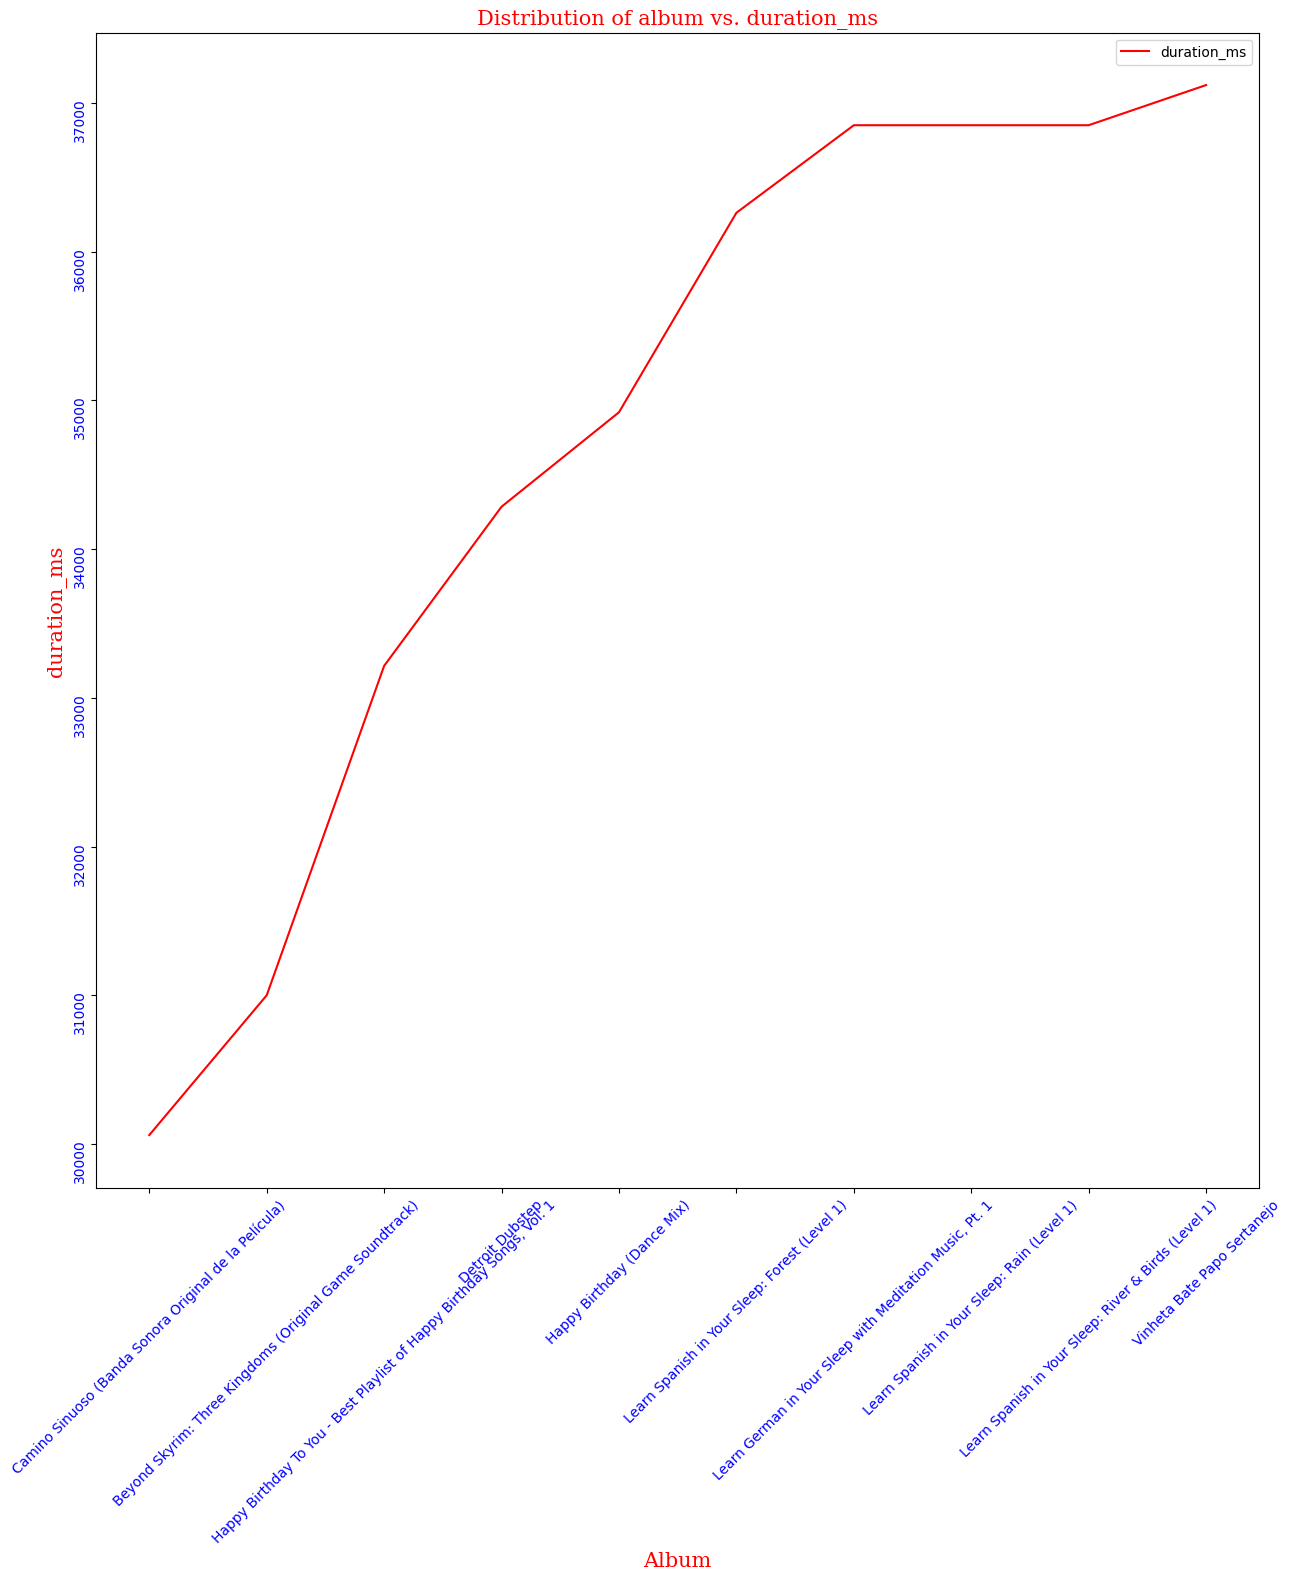

In [ ]:
plt.figure(figsize=(15,15))
plt.title("Distribution of album vs. duration_ms",fontdict=f)
top_10_popularity=data.groupby("album")["duration_ms"].mean().sort_values(ascending=True).head(10)
sn.lineplot(x=top_10_popularity.index,y=top_10_popularity.values,color="r",label="duration_ms")
plt.xticks(rotation=45,color="b")
plt.yticks(rotation=90,color="b")
plt.xlabel("Album",fontdict=f)
plt.ylabel("duration_ms",fontdict=f)
plt.show()

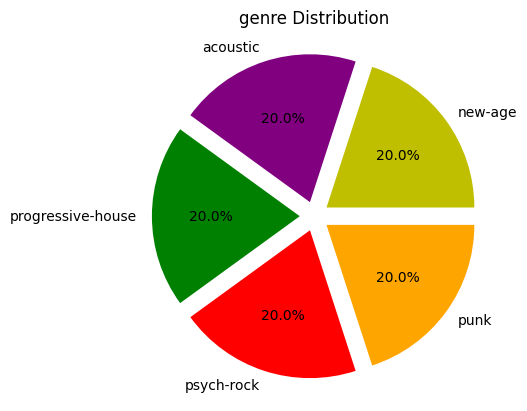

In [ ]:
f={"family":"serif","size":25,"color":"r"}
plt.title("genre Distribution")
genre=data["genre"].value_counts().head(5)
plt.pie(x=genre,colors=["y","purple","g","r","orange"],labels=["new-age","acoustic","progressive-house","psych-rock","punk"],explode=[0.1,0.1,0.1,0.1,0.1],autopct='%1.1f%%')
plt.show()

array([[<Axes: title={'center': 'popularity'}>,
        <Axes: title={'center': 'duration_ms'}>]], dtype=object)

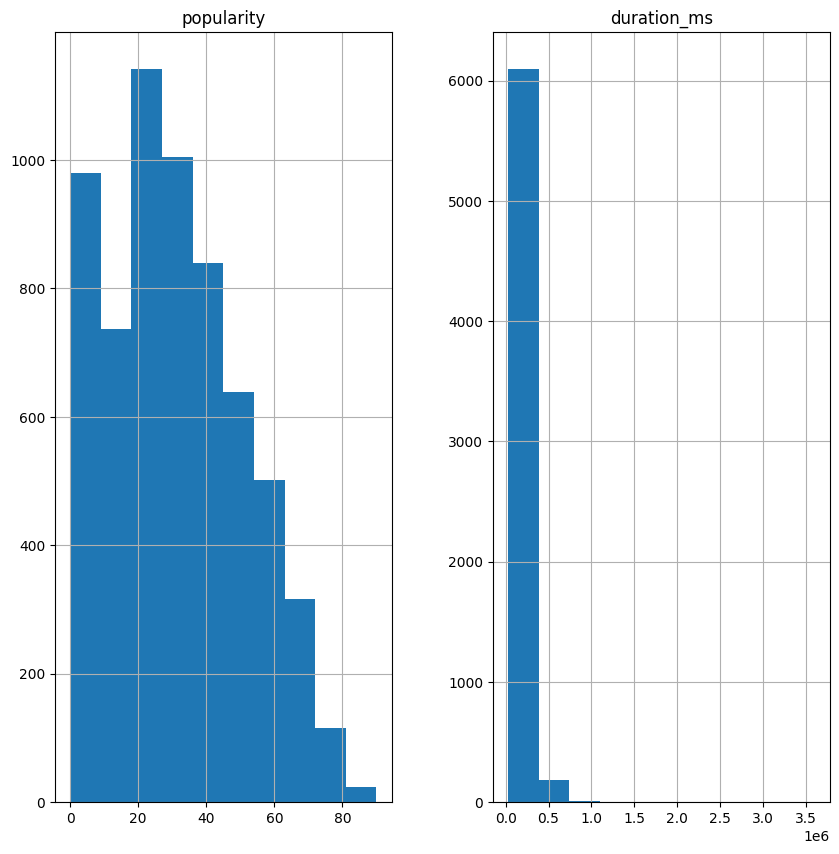

In [ ]:
data.hist(figsize=(10,10))

calculate correlation

In [ ]:
correlation=data.select_dtypes("number").corr()
correlation

,popularity,duration_ms
popularity,1.000000,0.023051
duration_ms,0.023051,1.000000


In [ ]:
spearman=data.select_dtypes("number").corr(method="spearman")
spearman

,popularity,duration_ms
popularity,1.000000,0.098908
duration_ms,0.098908,1.000000


HEATMAP CORRELATIONAL_MATRIX

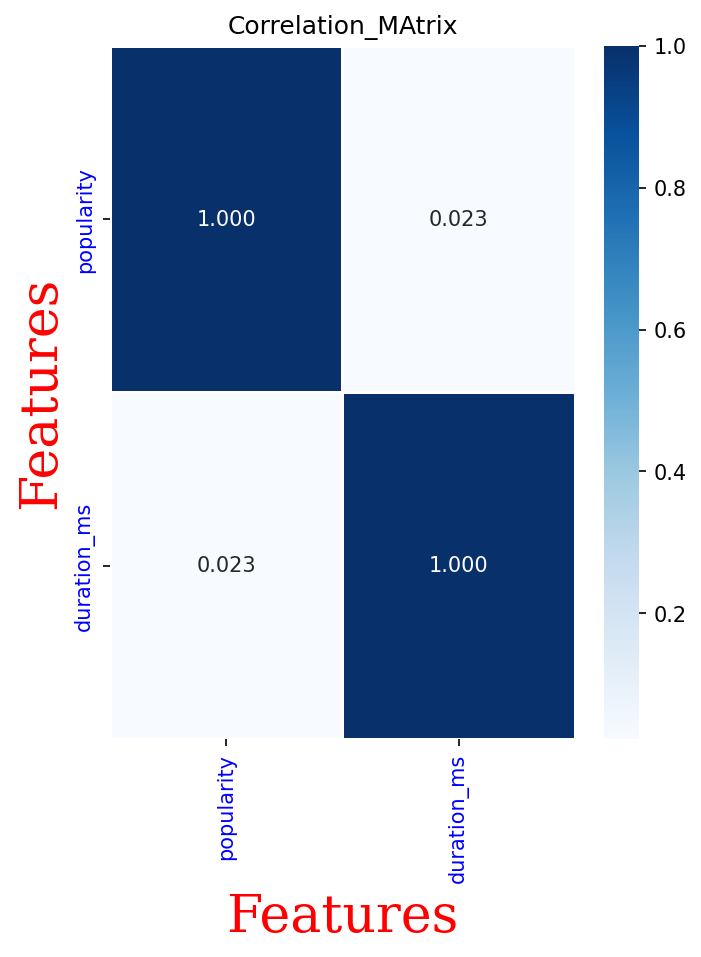

In [ ]:
plt.figure(figsize=(5,6),dpi=150)
plt.title("Correlation_MAtrix")
sn.heatmap(data.select_dtypes("number").corr(),annot=True,fmt="0.3f",cmap='Blues',linewidths=0.5)
plt.xlabel("Features",fontdict=f)
plt.ylabel("Features",fontdict=f)
plt.xticks(rotation=90,color="b")
plt.yticks(color="b",rotation=90)
plt.show()